<a href="https://www.kaggle.com/code/yassinenajem/disney-plus-recommendation-system?scriptVersionId=96867176" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### importing Data

In [2]:
df = pd.read_csv("../input/disney-movies-and-tv-shows/disney_plus_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


### --> Checking for missing values

In [4]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Text(0.5, 1.0, 'missing values in each column')

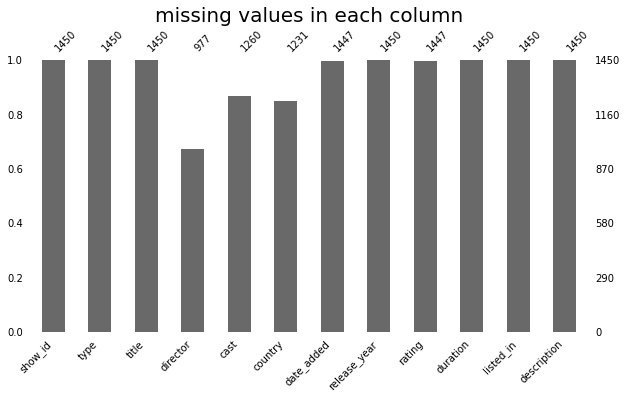

In [5]:
import missingno 
missingno.bar(df,fontsize=10,figsize=(10,5))
plt.title('missing values in each column',fontsize=20)

- There are missing values in column director,cast,country and date_added.
- We can't randomly fill the missing values in columns of director and cast, so we can drop them.
- For minimal number of missing values in country and date_added,rating

### Handling missing values

In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [7]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [10]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

0       Animation
1          Comedy
2       Animation
3         Musical
5    Biographical
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

0    2021
1    2021
2    2021
3    2021
5    2021
Name: year_add, dtype: object

In [12]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

0    November
1    November
2    November
3    November
5    November
Name: month_add, dtype: object

In [13]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

0    United States
1    United States
2    United States
3    United States
5    United States
Name: country_main, dtype: object

In [14]:
df['type'].value_counts()

Movie    880
Name: type, dtype: int64

In [15]:
df['rating'].value_counts()

G                234
PG               229
TV-G             166
TV-PG            134
PG-13             66
TV-14             21
TV-Y7             21
TV-Y7-FV           5
TV-Y               3
United States      1
Name: rating, dtype: int64

In [16]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [17]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,Animation,Join Mickey and the gang as they duck the halls!,2021,November,United States
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November,United States
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,Animation,Sid the Sloth is on Santa's naughty list.,2021,November,United States
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November,United States
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,Biographical,An inside look at the legendary life of advent...,2021,November,United States


## 3. Exploratory Data Analysis

### Number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

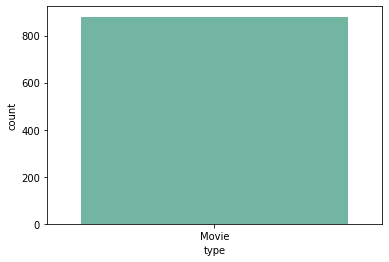

In [18]:
sb.countplot(x="type", data= df, palette="Set2")

<AxesSubplot:xlabel='rating', ylabel='count'>

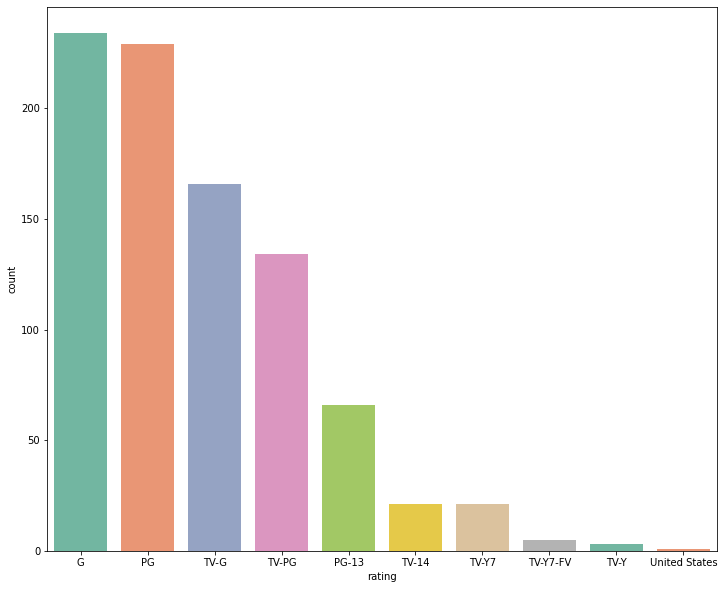

In [19]:
#number of movies & show 
plt.figure(figsize=(12,10))
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

### Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='release_year'>

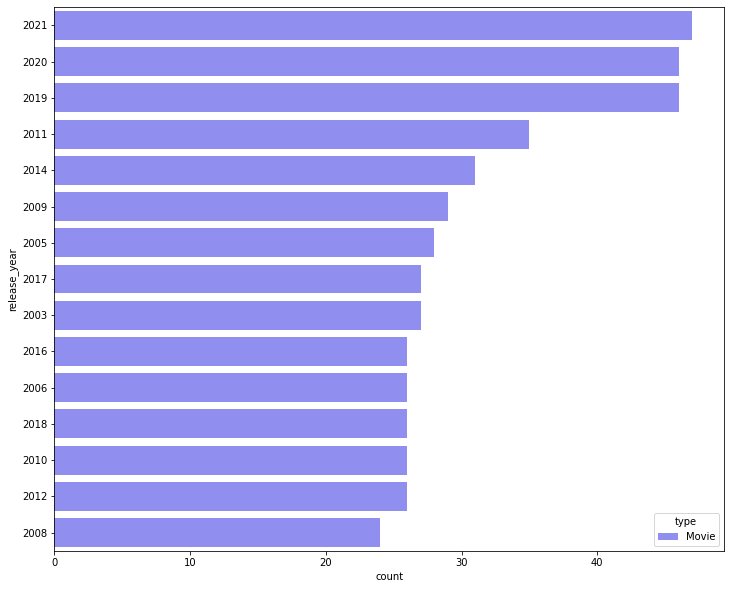

In [20]:
plt.figure(figsize=(12,10))
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

### Analysis of movies duration

In [21]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

0        23
1        91
2        23
3        41
5        94
       ... 
1445    108
1446    106
1447    107
1448    112
1449      2
Name: duration, Length: 880, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

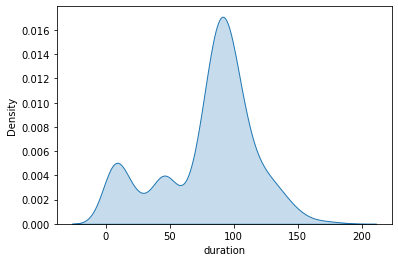

In [22]:
sb.kdeplot(data=movie_df['duration'], shade=True)

### Countries on top for movies content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

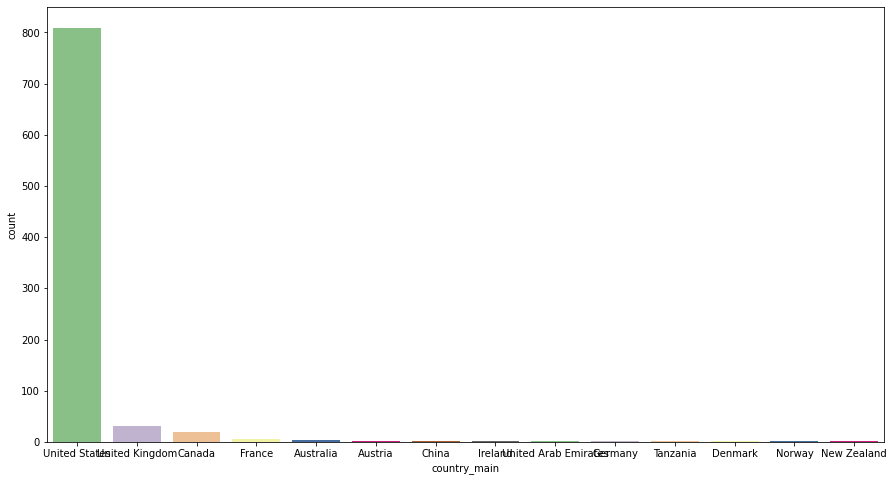

In [23]:
plt.figure(figsize=(15,8))
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

In [24]:
columns=['Genre','country_main']
gen_country = df[columns]

In [25]:
gen_country.head()

,Genre,country_main
0,Animation,United States
1,Comedy,United States
2,Animation,United States
3,Musical,United States
5,Biographical,United States


In [26]:
gen_country['Genre'].value_counts()

Action-Adventure    298
Animation           172
Comedy              141
Animals & Nature     73
Coming of Age        50
Documentary          49
Biographical         32
Drama                23
Buddy                13
Family               10
Concert Film          7
Fantasy               4
Crime                 3
Musical               2
Dance                 1
Sports                1
Anthology             1
Name: Genre, dtype: int64

In [27]:
size = gen_country['Genre'].value_counts()
size

Action-Adventure    298
Animation           172
Comedy              141
Animals & Nature     73
Coming of Age        50
Documentary          49
Biographical         32
Drama                23
Buddy                13
Family               10
Concert Film          7
Fantasy               4
Crime                 3
Musical               2
Dance                 1
Sports                1
Anthology             1
Name: Genre, dtype: int64

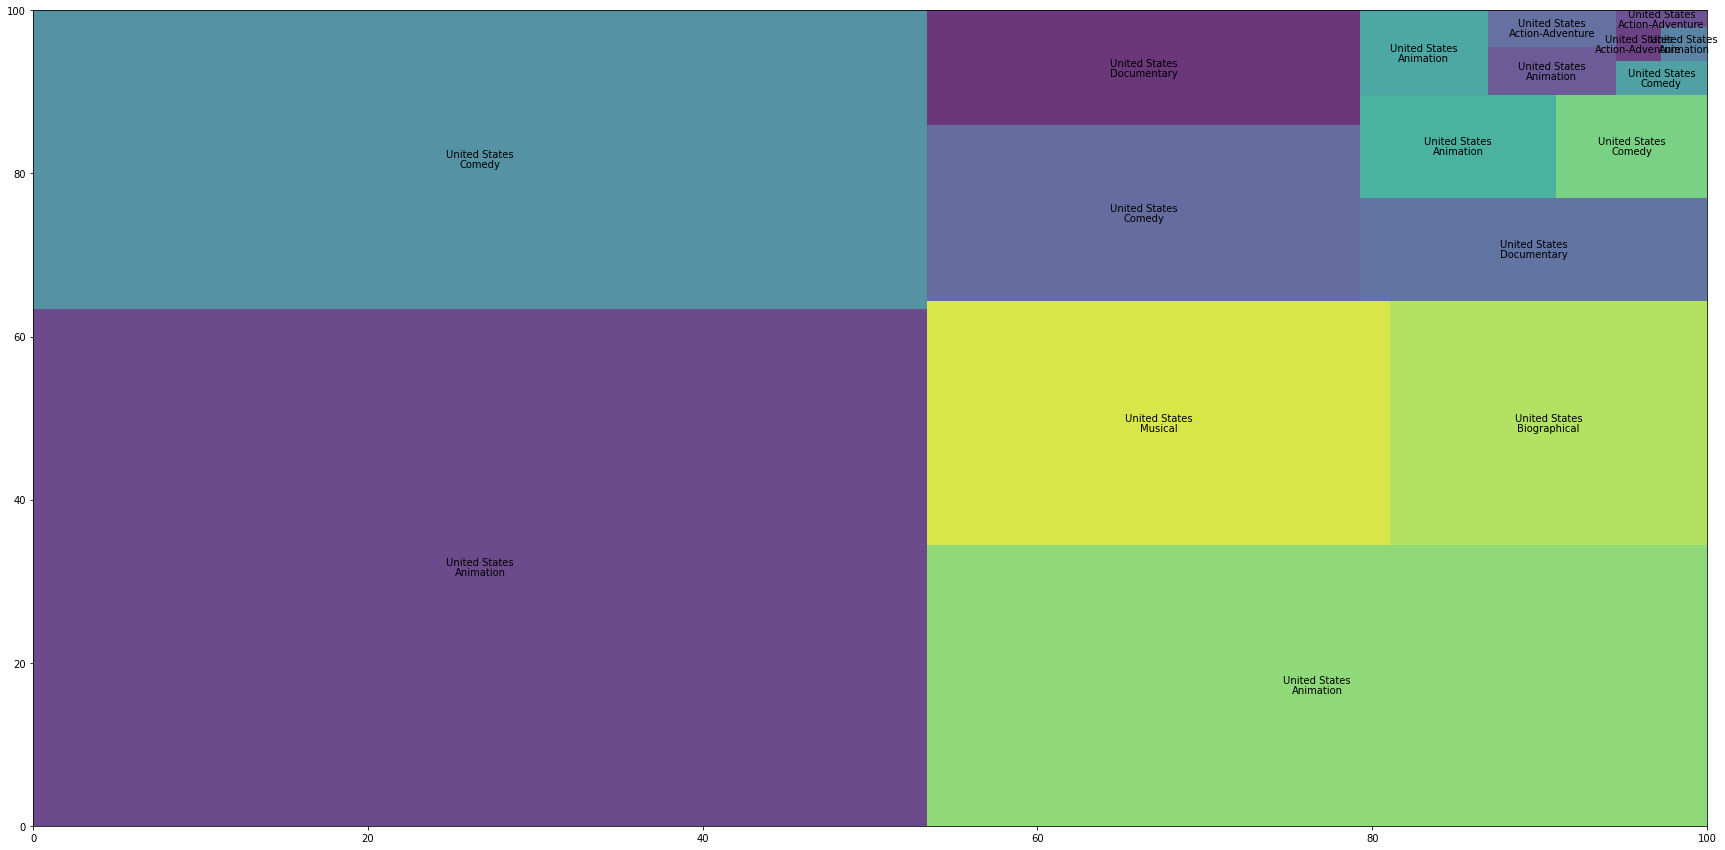

In [28]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

## Disney plus Recommendation System

## Multiple metrics(Genre,cast,description)  based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [29]:
features=['Genre','cast','description','title']
filters = df[features]

In [30]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [31]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,cast,description,title
0,animation,"chrisdiamantopoulos,tonyanselmo,tressmacneille...",joinmickeyandthegangastheyduckthehalls!,duckthehalls:amickeymousechristmasspecial
1,comedy,"jimvarney,noelleparker,douglasseale",santaclauspasseshismagicbagtoanewst.nic.,ernestsaveschristmas
2,animation,"raymondalbertromano,johnleguizamo,denisleary,q...",sidtheslothisonsanta'snaughtylist.,iceage:amammothchristmas
3,musical,"darrencriss,adamlambert,derekhough,alexanderje...","thisisreallife,notjustfantasy!",thequeenfamilysingalong
5,biographical,"jacquesyvescousteau,vincentcassel",aninsidelookatthelegendarylifeofadventurerjacq...,becomingcousteau


We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [32]:
def create_soup(x):
    return x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [33]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
filters.sort_values(by='Genre').head(60)

,Genre,cast,description,title,soup
1449,action-adventure,charlietahan,viewoneofsparky'sfavoritehomemovies.,captainsparkyvs.theflyingsaucers,charlietahan action-adventure viewoneofsparky'...
461,action-adventure,"johnnydepp,javierbardem,brentonthwaites,kayasc...",captainjacksparrowsearchesforthetridentofposei...,piratesofthecaribbean:deadmentellnotales,"johnnydepp,javierbardem,brentonthwaites,kayasc..."
1007,action-adventure,"tomkane,anthonydaniels,mattsloan,trevordevall,...",theenragedemperorsendsdarthvadertodestroyluke.,legostarwars:thenewyodachronicles-clashofthesk...,"tomkane,anthonydaniels,mattsloan,trevordevall,..."
1008,action-adventure,"tomkane,anthonydaniels,mattsloan,trevordevall,...",lukeskywalkerattemptsadaringraidoncoruscant.,legostarwars:thenewyodachronicles-raidoncoruscant,"tomkane,anthonydaniels,mattsloan,trevordevall,..."
454,action-adventure,"craignelson,hollyhunter,sarahvowell,huckleberr...",theincrediblesspringintoactionwhenadangerousne...,incredibles2,"craignelson,hollyhunter,sarahvowell,huckleberr..."
1009,action-adventure,"tomkane,anthonydaniels,mattsloan,trevordevall,...",lukeskywalkeraccidentlyopensaremainingholocron.,legostarwars: thenewyodachronicles–duelofthesk...,"tomkane,anthonydaniels,mattsloan,trevordevall,..."
1010,action-adventure,"tomkane,anthonydaniels,mattsloan,trevordevall,...",yodaandobi-wanrecallfreeingtheholocronsfromthe...,legostarwars:thenewyodachronicles–escapefromth...,"tomkane,anthonydaniels,mattsloan,trevordevall,..."
1011,action-adventure,"tomkane,anthonydaniels,mattsloan,trevordevall,...",obi-wanurgesluketotraveltotatooine.,legostarwars:thenewyodachronicles–racefortheho...,"tomkane,anthonydaniels,mattsloan,trevordevall,..."
1014,action-adventure,"daveighchase,chrissanders,davidstiers,kevinmcd...","dr.hamstervielforcesjumbatocreateleroy,theevil...",leroy&stitch,"daveighchase,chrissanders,davidstiers,kevinmcd..."
1020,action-adventure,"daveighchase,christophersanders,tiacarrere,dav...",alittlegirladoptsawantedalienwreakinghavoconth...,lilo&stitch,"daveighchase,christophersanders,tiacarrere,dav..."


In [37]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [38]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

## testing the recommendation system

In [39]:
get_recommendations_new('x-men:apocalypse', cosine_sim2)

50                                     X-Men: First Class
477                            X-Men: Days of Future Past
117                                   X-Men: Dark Phoenix
530         Star Wars: The Rise of Skywalker (Episode IX)
675               Star Wars: The Last Jedi (Episode VIII)
1268    The Chronicles of Narnia: The Lion, the Witch ...
272                                       Gnomeo & Juliet
901                                             Free Solo
1449                Captain Sparky vs. The Flying Saucers
1181          Sea of Hope: America's Underwater Treasures
Name: title, dtype: object

In [40]:
get_recommendations_new('iceage:collisioncourse', cosine_sim2)

156               Walking with Dinosaurs: The Movie
1113                           Operation Dumbo Drop
1444                 Ice Age: Dawn Of The Dinosaurs
151                           Ice Age: The Meltdown
901                                       Free Solo
1449          Captain Sparky vs. The Flying Saucers
1181    Sea of Hope: America's Underwater Treasures
2                      Ice Age: A Mammoth Christmas
958                  Ice Age: The Great Egg-Scapade
1176                            Sanjay's Super Team
Name: title, dtype: object

In [41]:
get_recommendations_new('tarzan', cosine_sim2)

493                                             Tarzan II
1348                                 The Three Musketeers
710                                        102 Dalmatians
901                                             Free Solo
1449                Captain Sparky vs. The Flying Saucers
1181          Sea of Hope: America's Underwater Treasures
1176                                  Sanjay's Super Team
1407                  Winged Seduction: Birds of Paradise
393     The Chronicles Of Narnia: The Voyage of the Da...
689                                     Expedition Amelia
Name: title, dtype: object